<a href="https://colab.research.google.com/github/Ru1chi/First-Project/blob/main/DecisionTreeClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#decision tree is used for classification(categorical data) and regression(continous variable) entropy-checks how much your subset is pure
import pandas as pd


In [24]:
df=pd.read_excel("/content/book3.xlsx")

In [25]:
df


,outlook,humidity,windy,play
0,sunny,high,weak,no
1,sunny,high,strong,no
2,overcast,high,weak,yes
3,rainy,high,weak,yes
4,rainy,normal,weak,yes
5,rainy,normal,strong,no
6,overcast,normal,weak,yes
7,sunny,high,weak,no
8,sunny,normal,weak,yes
9,rainy,normal,weak,yes


In [26]:
#it cannot understand the data with variables therefore we need to convert it into numbers
from sklearn.preprocessing import LabelEncoder

In [27]:
#create  object of labelencoder method
outlook=LabelEncoder()
humidity=LabelEncoder()
windy=LabelEncoder()
play=LabelEncoder()

In [28]:
#now replace them with numbers
df['outlook']=outlook.fit_transform(df['outlook'])

df['humidity']=outlook.fit_transform(df['humidity'])

df['windy']=outlook.fit_transform(df['windy'])

df['play']=outlook.fit_transform(df['play'])


In [29]:
df

,outlook,humidity,windy,play
0,2,0,1,0
1,2,0,0,0
2,0,0,1,1
3,1,0,1,1
4,1,1,1,1
5,1,1,0,0
6,0,1,1,1
7,2,0,1,0
8,2,1,1,1
9,1,1,1,1


In [30]:
features_cols=['outlook',	'humidity',	'windy']
x=df[features_cols]
y=df.play

In [31]:
x

,outlook,humidity,windy
0,2,0,1
1,2,0,0
2,0,0,1
3,1,0,1
4,1,1,1
5,1,1,0
6,0,1,1
7,2,0,1
8,2,1,1
9,1,1,1


In [32]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int64

In [33]:
#train_test_split import
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [35]:
#IMPORT CLASSIFIESR
from sklearn.tree import DecisionTreeClassifier

In [36]:
classifier=DecisionTreeClassifier(criterion='gini')

In [37]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
classifier.predict(x_test)

array([1, 0, 1])

In [39]:
x_test # 0=no   1=yes   outlook[sunny=2,overcast=0,rainy=1]

,outlook,humidity,windy
12,0,1,1
1,2,0,0
13,1,0,0


In [41]:
classifier.score(x_test,y_test)

0.6666666666666666

In [42]:
# now to make the tree
from sklearn import tree

[Text(0.5555555555555556, 0.875, 'x[0] <= 1.5\ngini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(0.3333333333333333, 0.625, 'x[2] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.2222222222222222, 0.375, 'x[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.7777777777777778, 0.625, 'x[1] <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

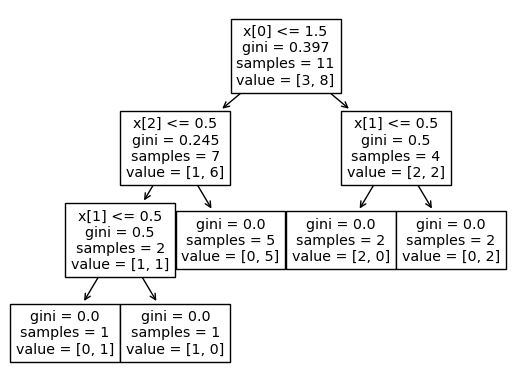

In [44]:
tree.plot_tree(classifier)
